In [1]:
import numpy as np
import pandas as pd
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import skew, boxcox, shapiro, normaltest, kstest

#from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
medical_insurance_df = pd.read_csv(r'C:\Users\ramma\OneDrive\My_Data\Velocity_Data_Science\Project\Medical_Insurance_Charges/CSV_Files/medical_insurance.csv')
medical_insurance_df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df = medical_insurance_df
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df[df.duplicated()]

,age,gender,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df = df[~df.duplicated()]
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Age

In [10]:
df['age'].skew()

0.054780773126998195

<AxesSubplot: >

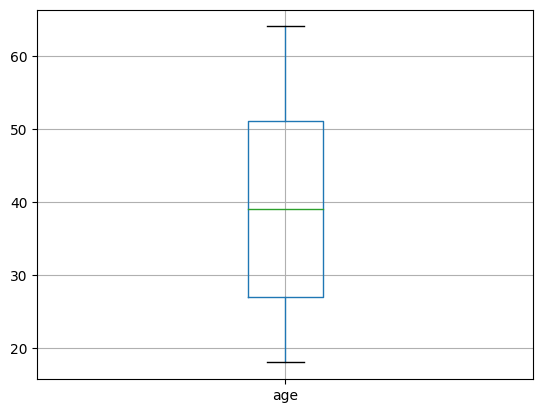

In [11]:
df[['age']].boxplot()

In [12]:
plt.figure(figsize=(4,2))
sns.boxplot(x= df['age'])

<AxesSubplot: xlabel='age'>

In [13]:
sns.histplot(df['age'], kde = True)

<AxesSubplot: xlabel='age', ylabel='Count'>

In [14]:
plt.hist(df['age'], bins = 10, )

(array([221., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

In [15]:
sns.distplot(df['age'])

<AxesSubplot: xlabel='age', ylabel='Count'>

In [16]:
sns.kdeplot(df['age'])

<AxesSubplot: xlabel='age', ylabel='Count'>

In [17]:
df['age'].plot(kind = 'kde')

<AxesSubplot: xlabel='age', ylabel='Density'>

## BMI

In [18]:
df['bmi'].skew()

0.28391419385321137

In [19]:
sns.boxplot(x = df['bmi'])

<AxesSubplot: xlabel='bmi', ylabel='Density'>

In [20]:
sns.histplot(df['bmi'], kde = True)

<AxesSubplot: xlabel='bmi', ylabel='Density'>

In [21]:
df['bmi'].describeribe()

AttributeError: 'Series' object has no attribute 'describeribe'

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1 
upper_tail = Q3 + 1.5*IQR 
lower_tail = Q1 - 1.5*IQR 
upper_tail

In [ ]:
df[df['bmi']>upper_tail]

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1 
upper_tail = Q3 + 2.5*IQR 
lower_tail = Q1 - 2.5*IQR 
upper_tail

In [22]:
df[df['bmi']>upper_tail]

NameError: name 'upper_tail' is not defined

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## gender

In [24]:
df['gender'].value_counts().to_dict()

{'male': 675, 'female': 662}

In [25]:
medical_insurance_df['gender'].value_counts().plot(kind = 'pie', autopct = '%.2f')

<AxesSubplot: xlabel='bmi', ylabel='gender'>

In [26]:
df['gender'].replace({'male': 1, 'female': 0}, inplace=True)
df['gender']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: gender, Length: 1337, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 83.6+ KB


## Smoker

In [28]:
df['smoker'].value_counts().to_dict()

{'no': 1063, 'yes': 274}

In [29]:
medical_insurance_df['smoker'].value_counts().plot(kind = 'pie', autopct = '%.2f')

<AxesSubplot: xlabel='bmi', ylabel='smoker'>

In [30]:
df['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1337, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


## Region

In [32]:
df['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 324, 'northeast': 324}

In [33]:
df['region'].value_counts().plot(kind = 'bar')

<AxesSubplot: xlabel='bmi', ylabel='smoker'>

In [34]:
df = pd.get_dummies(df, columns=['region'])
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   gender            1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   uint8  
 7   region_northwest  1337 non-null   uint8  
 8   region_southeast  1337 non-null   uint8  
 9   region_southwest  1337 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 78.3 KB


## charges

In [36]:
df[['charges']].boxplot()

<AxesSubplot: xlabel='bmi', ylabel='smoker'>

In [37]:
sns.histplot(df['charges'], kde = True)

<AxesSubplot: xlabel='bmi', ylabel='smoker'>

In [38]:
df.corr()[['charges']].sort_values('charges').T

,region_southwest,region_northwest,region_northeast,gender,children,region_southeast,bmi,age,smoker,charges
charges,-0.043637,-0.038695,0.005945,0.058044,0.067389,0.073578,0.198401,0.298308,0.787234,1.0


In [39]:
sns.heatmap(df.corr()[['charges']].sort_values('charges'))

<AxesSubplot: >

In [40]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [41]:
VIF_list = []

for i in range(len(x.columns)):
    VIF = vif(x.to_numpy(), i)
    print(VIF, x.columns[i])

1.0167942534168934 age
1.0089440509723557 gender
1.106741891080617 bmi
1.0040168206022642 children
1.012099538265244 smoker
8.603955373476417 region_northeast
8.617019200973745 region_northwest
11.535961199827815 region_southeast
9.219311138837474 region_southwest


In [42]:
def eval_metrix(actual, predicted):
    RMSE = np.sqrt(mean_squared_error(actual, predicted))
    MAE = mean_absolute_error(actual, predicted)
    R2 = r2_score(actual, predicted)
    return {'RMSE': RMSE, 'MAE': MAE, 'R2': R2}

In [43]:
df.to_csv(r'CSV_Files/cleaned_medical_insurance_data.csv', index = False)

# Model

In [44]:
x = df.drop('charges', axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [50]:
lin_reg.score(x_train, y_train)

0.7542185980930619

In [51]:
lin_reg.score(x_test, y_test)

0.7340977046406103

In [52]:
y_train_pred = lin_reg.predict(x_train)

eval_metrix(y_train, y_train_pred)

{'RMSE': 6058.462041800733, 'MAE': 4174.796068223895, 'R2': 0.7542185980930619}

In [53]:
y_test_pred = lin_reg.predict(x_test)

eval_metrix(y_test, y_test_pred)

{'RMSE': 5999.433338007098, 'MAE': 4058.749799233717, 'R2': 0.7340977046406103}

In [48]:
######################################

In [49]:
gscv_lasso = GridSearchCV(Lasso(), {'alpha' : np.arange(0.01, 5, 0.01)}, cv=5)
gscv_lasso.fit(x_train, y_train)
gscv_lasso.best_params_

{'alpha': 4.99}

In [50]:
lasso_reg = Lasso(alpha = gscv_lasso.best_params_['alpha'])
lasso_reg.fit(x_train, y_train)

Lasso(alpha=4.99)

In [51]:
y_train_pred = lasso_reg.predict(x_train)

eval_metrix(y_train, y_train_pred)

{'RMSE': 6058.521396939699, 'MAE': 4176.142178256059, 'R2': 0.7542137821973357}

In [52]:
y_test_pred = lasso_reg.predict(x_test)

eval_metrix(y_test, y_test_pred)

{'RMSE': 5998.256492361442,
 'MAE': 4059.1785275288353,
 'R2': 0.7342020129141225}

In [53]:
##########################################

In [54]:
gscv_ridge = GridSearchCV(Ridge(), {'alpha' : np.arange(0.01, 5, 0.01)}, cv=5)
gscv_ridge.fit(x_train, y_train)
gscv_ridge.best_params_

{'alpha': 1.82}

In [55]:
ridge_reg = Ridge(alpha = gscv_ridge.best_params_['alpha'])
ridge_reg.fit(x_train, y_train)

Ridge(alpha=1.82)

In [56]:
y_train_pred = ridge_reg.predict(x_train)

eval_metrix(y_train, y_train_pred)

{'RMSE': 6059.307750836565, 'MAE': 4194.262765765616, 'R2': 0.7541499753770332}

In [57]:
y_test_pred = ridge_reg.predict(x_test)

eval_metrix(y_test, y_test_pred)

{'RMSE': 5989.477907875149,
 'MAE': 4068.8245190791577,
 'R2': 0.7349794463727033}

In [58]:
##############################################

# Testing 

In [54]:
project_data = {'gender' : {'male': 0, 'female': 1},
               'smoker' : {'no': 0, 'yes': 1},
               'Columns' : x.columns.to_list()}

project_data

{'gender': {'male': 0, 'female': 1},
 'smoker': {'no': 0, 'yes': 1},
 'Columns': ['age',
  'gender',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [55]:
x.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [60]:
age              =   19.0
gender           =    'male'
bmi              =   27.9
children         =    0.0
smoker           =    'yes'
region           =    'southeast'

gender = project_data['gender'][gender]
smoker = project_data['smoker'][smoker]

region = 'region_' + region
region_index = np.where(x.columns == region)[0][0]

test_array = np.zeros(x.shape[1])

test_array[0] = age
test_array[1] = gender
test_array[2] = bmi
test_array[3] = children
test_array[4] = smoker
test_array[region_index] = 1


test_df = pd.DataFrame([test_array], columns=project_data['Columns'])

predicted_charges = np.around(lin_reg.predict(test_df)[0], 3)
predicted_charges

25472.875

In [62]:
pickle.dump(lin_reg, open('artifacts/linear_reg_model.pkl', 'wb'))

In [63]:
json.dump(project_data, open(r'artifacts/project_data.json', 'w'))

In [64]:
Project_Data = json.load(open(r'artifacts/project_data.json', 'r'))

In [65]:
Project_Data['Columns']

['age',
 'gender',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [66]:
columns = project_data['Columns']
columns

['age',
 'gender',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']